# New Feature Testing
Since the presentation, we've been working on making new features from demographics of victims, TRR action responses, and count of officer filed complaints. A full explanation and exploratory analysis of that data can be found in exploratory pt1 in the the notebooks directory

This notebook is to throw new features in logistic, decision tree, random forest models and see if we get better predictions out

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sys
import os
sys.path.insert(0, os.path.abspath("../pipeline"))
import Make_By_Officer_DF as make_officer_df
import Feat_Engineering as feat_engineering_helpers
import Run_Model as run_model
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
t1 = (2012, 2014)
t2 = (2015, 2015)
additional_cont_feat, final_df = make_officer_df.make_df(t1, t2)


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (4,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (3,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (0,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [3]:
display(final_df.isna().sum())


target_use_of_force      0
target_drug              0
target_racial            0
target_sustained         0
target_nonviolent        0
                      ... 
current_unit             0
average_salary         104
salary_change           45
race                     0
gender                   0
Length: 66, dtype: int64

## Test new features with simple logistic model

In [5]:
cont_feat = ["birth_year", "start_date_timestamp"]
cont_feat.extend(additional_cont_feat)
#cont_feat.remove("trr_firearms_total")
#cont_feat.remove("trr_taser_total")
cat_feat = ["gender", "race", "cleaned_rank"]


In [6]:
desired_targets = ['target_use_of_force', 'target_drug', 'target_racial',
                   'target_sustained', 'target_nonviolent']
target_col = "any_known_complaint"
feat_engineering_helpers.make_target_col(final_df, desired_targets, target_col)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

best  LogisticRegression  metrics:
{'precision': 0.38461538461538464, 'recall': 0.024630541871921183, 'f1-score': 0.046296296296296294, 'support': 203}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'fixed val threshold metrics: '

,precision,recall,balanced_accuracy
Cutoff,,,
0.00000,0.141463,1.000000,0.500000
0.00001,0.141958,1.000000,0.502029
0.01000,0.142456,1.000000,0.504058
0.05000,0.144699,0.995074,0.512959
0.10000,0.172308,0.827586,0.586277
0.20000,0.273109,0.320197,0.589887
0.50000,0.384615,0.024631,0.509069
0.70000,0.375000,0.014778,0.505360
0.90000,0.000000,0.000000,0.500000


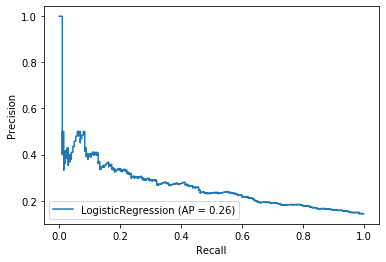

In [7]:
log, log_labels =  run_model.single_model(final_df, "LogisticRegression", 
                                          target_col, cont_feat, cat_feat, "balanced_accuracy")

In [ ]:
log_labels

In [ ]:
rf, rf_labels =  run_model.single_model(final_df, "RandomForest", 
                                          target_col, cont_feat, cat_feat, "balanced_accuracy")

In [ ]:
rf_feature_headers = list(rf_labels)
rf_feature_headers.remove("any_known_complaint")

In [ ]:
rf_features = pd.DataFrame(index = rf_feature_headers, data= rf.feature_importances_)

In [ ]:
pd.set_option('display.max_rows', 73)
rf_features.sort_values(0, ascending=False)

This good news! The new features seems to matter, have interpretable results. 
Next steps could probably involve limiting features, but we aren't sure exactly how to go about that
Visualizations to tell story. Also tell story of how we chose our y
We should do more with victim demographics, it seems to matter and we've only done one aspect. Next do victim buckets 